<a id='Title-Binary-Classification'></a>
<h1 style="color:SlateGray;">4_Overfitting_And_Underfitting</h1>

**Input dataset**

IMBD: set of movie reviews with adjustable limit on max word count.

**Output classification**

Binary categorization (positive/negative) of a movie review.

<h2 style="color:SlateGray;">Background</h2>

**Layers**

[*Dense*](1_Image_Classification.ipynb#Layers-Dense)
		
**Activations**

[*relu*](1_Image_Classification.ipynb#Activations-relu)

[*sigmoid*](2_Binary_Classification.ipynb#Activations-sigmoid)
		
**Optimizers**

[*rmsprop*](1_Image_Classification.ipynb#Optimizers-rmsprop)
		
**Loss functions**

[*binary_crossentropy*](2_Binary_Classification.ipynb#Loss-functions-binary_crossentropy)

<h2 style="color:SlateGray;">Overview</h2>

Predict whether a written movie review is overall positive or negative.

The input data set consists of 25,000 training samples and 25,000 test samples, the associated labels contain either 0 or 1 (positive or negative). This example encodes each review by the 10,000 most frequently used words. The training samples are partitioned to be 15,000 training and 10,000 validation, each sample is one-hot encoded.

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))
original_model.summary()

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))
smaller_model.summary()

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [5]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))
bigger_model.summary()

bigger_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [6]:
original_hist = original_model.fit(x_train,
                                   y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 9s 360us/step - loss: 0.4523 - acc: 0.8201 - val_loss: 0.3374 - val_acc: 0.8769 - acc: 0
Epoch 2/20
25000/25000 [==============================] - 4s 173us/step - loss: 0.2530 - acc: 0.9102 - val_loss: 0.2877 - val_acc: 0.8864
Epoch 3/20
25000/25000 [==============================] - 4s 171us/step - loss: 0.1977 - acc: 0.9286 - val_loss: 0.2811 - val_acc: 0.8890
Epoch 4/20
25000/25000 [==============================] - 4s 172us/step - loss: 0.1657 - acc: 0.9416 - val_loss: 0.2961 - val_acc: 0.8826
Epoch 5/20
25000/25000 [==============================] - 4s 172us/step - loss: 0.1470 - acc: 0.9469 - val_loss: 0.3125 - val_acc: 0.8802
Epoch 6/20
25000/25000 [==============================] - 4s 171us/step - loss: 0.1275 - acc: 0.9558 - val_loss: 0.3383 - val_acc: 0.8749
Epoch 7/20
25000/25000 [==============================] - 4s 172us/step - loss: 0.1142 - acc: 0.9598 - val_loss: 

In [7]:
smaller_hist = smaller_model.fit(x_train,
                                 y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 181us/step - loss: 0.5804 - acc: 0.7027 - val_loss: 0.5309 - val_acc: 0.7558
Epoch 2/20
25000/25000 [==============================] - 4s 171us/step - loss: 0.4843 - acc: 0.8455 - val_loss: 0.4876 - val_acc: 0.8280
Epoch 3/20
25000/25000 [==============================] - 4s 173us/step - loss: 0.4389 - acc: 0.8920 - val_loss: 0.4663 - val_acc: 0.8497
Epoch 4/20
25000/25000 [==============================] - 4s 173us/step - loss: 0.4077 - acc: 0.9154 - val_loss: 0.4526 - val_acc: 0.8663 0s - loss: 0.4088 - 
Epoch 5/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.3832 - acc: 0.9306 - val_loss: 0.4513 - val_acc: 0.8620
Epoch 6/20
25000/25000 [==============================] - 4s 173us/step - loss: 0.3620 - acc: 0.9415 - val_loss: 0.4424 - val_acc: 0.8728
Epoch 7/20
25000/25000 [==============================] - 4s 175us/step - loss: 0.3425 - acc: 0.9515 

In [8]:
bigger_hist = bigger_model.fit(x_train,
                               y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 215us/step - loss: 0.4617 - acc: 0.8022 - val_loss: 0.2787 - val_acc: 0.8868
Epoch 2/20
25000/25000 [==============================] - 5s 198us/step - loss: 0.2216 - acc: 0.9111 - val_loss: 0.2886 - val_acc: 0.8816
Epoch 3/20
25000/25000 [==============================] - 5s 197us/step - loss: 0.1276 - acc: 0.9514 - val_loss: 0.3223 - val_acc: 0.8840
Epoch 4/20
25000/25000 [==============================] - 5s 213us/step - loss: 0.0668 - acc: 0.9818 - val_loss: 0.5999 - val_acc: 0.8396
Epoch 5/20
25000/25000 [==============================] - 5s 215us/step - loss: 0.0610 - acc: 0.9873 - val_loss: 0.4668 - val_acc: 0.8818
Epoch 6/20
25000/25000 [==============================] - 5s 200us/step - loss: 0.0565 - acc: 0.9884 - val_loss: 0.5015 - val_acc: 0.8802
Epoch 7/20
25000/25000 [==============================] - 5s 207us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.7037 - 

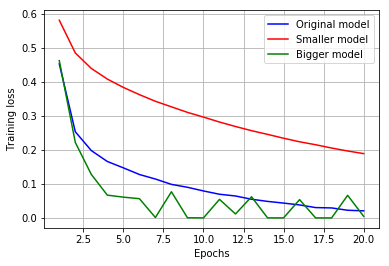

In [10]:
import matplotlib.pyplot as plt
epochs = range(1, 21)

original_train_loss = original_hist.history['loss']
smaller_model_train_loss = smaller_hist.history['loss']
bigger_model_train_loss = bigger_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b', label='Original model')
plt.plot(epochs, smaller_model_train_loss, 'r', label='Smaller model')
plt.plot(epochs, bigger_model_train_loss, 'g', label='Bigger model')

plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()
plt.grid()


plt.show()

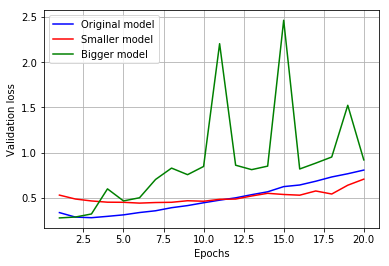

In [11]:
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_hist.history['val_loss']
bigger_model_val_loss = bigger_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'r', label='Smaller model')
plt.plot(epochs, bigger_model_val_loss, 'g', label='Bigger model')

plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.grid()

plt.show()

In [12]:
from keras import regularizers

original_model_l1 = models.Sequential()
original_model_l1.add(layers.Dense(16, 
                                   kernel_regularizer=regularizers.l1(0.001),
                                   activation='relu',
                                   input_shape=(10000,)))
original_model_l1.add(layers.Dense(16,
                                   kernel_regularizer=regularizers.l1(0.001),
                                   activation='relu'))
original_model_l1.add(layers.Dense(1, activation='sigmoid'))
original_model_l1.summary()

original_model_l1.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
original_model_l2 = models.Sequential()
original_model_l2.add(layers.Dense(16, 
                                   kernel_regularizer=regularizers.l2(0.001),
                                   activation='relu',
                                   input_shape=(10000,)))
original_model_l2.add(layers.Dense(16,
                                   kernel_regularizer=regularizers.l2(0.001),
                                   activation='relu'))
original_model_l2.add(layers.Dense(1, activation='sigmoid'))
original_model_l2.summary()

original_model_l2.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
original_model_l1_l2 = models.Sequential()
original_model_l1_l2.add(layers.Dense(16, 
                                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                                      activation='relu',
                                      input_shape=(10000,)))
original_model_l1_l2.add(layers.Dense(16,
                                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                                      activation='relu'))
original_model_l1_l2.add(layers.Dense(1, activation='sigmoid'))
original_model_l1_l2.summary()

original_model_l1_l2.compile(optimizer='rmsprop',
                             loss='binary_crossentropy',
                             metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
l1_model = original_model_l1.fit(x_train,
                                 y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 200us/step - loss: 0.9069 - acc: 0.7896 - val_loss: 0.6434 - val_acc: 0.8458
Epoch 2/20
25000/25000 [==============================] - 4s 177us/step - loss: 0.5959 - acc: 0.8631 - val_loss: 0.5877 - val_acc: 0.8556
Epoch 3/20
25000/25000 [==============================] - 4s 172us/step - loss: 0.5511 - acc: 0.8728 - val_loss: 0.5645 - val_acc: 0.8590
Epoch 4/20
25000/25000 [==============================] - 4s 172us/step - loss: 0.5277 - acc: 0.8772 - val_loss: 0.5383 - val_acc: 0.8666
Epoch 5/20
25000/25000 [==============================] - 4s 179us/step - loss: 0.5149 - acc: 0.8792 - val_loss: 0.5163 - val_acc: 0.8750
Epoch 6/20
25000/25000 [==============================] - 4s 173us/step - loss: 0.5039 - acc: 0.8826 - val_loss: 0.5514 - val_acc: 0.8545
Epoch 7/20
25000/25000 [==============================] - 4s 172us/step - loss: 0.4995 - acc: 0.8802 - val_loss: 0.5381 - 

In [16]:
l2_model = original_model_l2.fit(x_train, 
                                 y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 186us/step - loss: 0.4966 - acc: 0.8194 - val_loss: 0.3871 - val_acc: 0.8792
Epoch 2/20
25000/25000 [==============================] - 4s 179us/step - loss: 0.3213 - acc: 0.9042 - val_loss: 0.3504 - val_acc: 0.8811
Epoch 3/20
25000/25000 [==============================] - 4s 175us/step - loss: 0.2776 - acc: 0.9177 - val_loss: 0.3409 - val_acc: 0.8831
Epoch 4/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.2558 - acc: 0.9260 - val_loss: 0.3370 - val_acc: 0.8858
Epoch 5/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.2415 - acc: 0.9318 - val_loss: 0.3610 - val_acc: 0.8752
Epoch 6/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.2326 - acc: 0.9363 - val_loss: 0.3711 - val_acc: 0.8737
Epoch 7/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.2276 - acc: 0.9373 - val_loss: 0.3518 - 

In [17]:
l1_l2_model = original_model_l1_l2.fit(x_train, 
                                       y_train, 
                                       epochs=20, 
                                       batch_size=512, 
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 187us/step - loss: 0.9380 - acc: 0.7790 - val_loss: 0.7300 - val_acc: 0.7773
Epoch 2/20
25000/25000 [==============================] - 4s 175us/step - loss: 0.6398 - acc: 0.8506 - val_loss: 0.6411 - val_acc: 0.8304
Epoch 3/20
25000/25000 [==============================] - 4s 177us/step - loss: 0.5980 - acc: 0.8555 - val_loss: 0.5912 - val_acc: 0.8558
Epoch 4/20
25000/25000 [==============================] - 5s 186us/step - loss: 0.5773 - acc: 0.8614 - val_loss: 0.5687 - val_acc: 0.8620
Epoch 5/20
25000/25000 [==============================] - 5s 201us/step - loss: 0.5640 - acc: 0.8618 - val_loss: 0.5692 - val_acc: 0.8582
Epoch 6/20
25000/25000 [==============================] - 5s 198us/step - loss: 0.5494 - acc: 0.8658 - val_loss: 0.5482 - val_acc: 0.8654
Epoch 7/20
25000/25000 [==============================] - 5s 203us/step - loss: 0.5359 - acc: 0.8690 - val_loss: 0.5641 - 

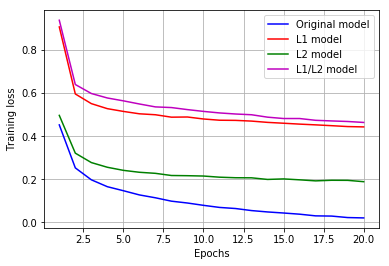

In [18]:
l1_model_train_loss = l1_model.history['loss']
l2_model_train_loss = l2_model.history['loss']
l1_l2_model_train_lost = l1_l2_model.history['loss']

plt.plot(epochs, original_train_loss, 'b', label='Original model')
plt.plot(epochs, l1_model_train_loss, 'r', label='L1 model')
plt.plot(epochs, l2_model_train_loss, 'g', label='L2 model')
plt.plot(epochs, l1_l2_model_train_lost, 'm', label='L1/L2 model')

plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()
plt.grid()

plt.show()

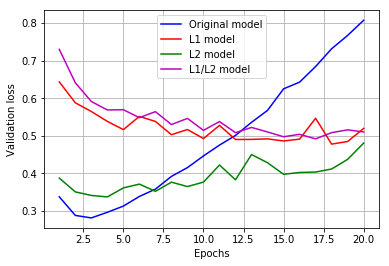

In [20]:
l1_model_val_loss = l1_model.history['val_loss']
l2_model_val_loss = l2_model.history['val_loss']
l1_l2_model_val_lost = l1_l2_model.history['val_loss']

plt.plot(epochs, original_val_loss, 'b', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'r', label='L1 model')
plt.plot(epochs, l2_model_val_loss, 'g', label='L2 model')
plt.plot(epochs, l1_l2_model_val_lost, 'm', label='L1/L2 model')

plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.grid()


plt.show()

In [21]:
dropout_model = models.Sequential()
dropout_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(16, activation='relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(1, activation='sigmoid'))
dropout_model.summary()

dropout_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [22]:
dropout_model_hist = dropout_model.fit(x_train,
                                       y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 201us/step - loss: 0.5963 - acc: 0.6720 - val_loss: 0.4509 - val_acc: 0.8563
Epoch 2/20
25000/25000 [==============================] - 4s 177us/step - loss: 0.4414 - acc: 0.8197 - val_loss: 0.3414 - val_acc: 0.8836
Epoch 3/20
25000/25000 [==============================] - 5s 182us/step - loss: 0.3557 - acc: 0.8696 - val_loss: 0.2940 - val_acc: 0.8886
Epoch 4/20
25000/25000 [==============================] - 4s 179us/step - loss: 0.2968 - acc: 0.9008 - val_loss: 0.2823 - val_acc: 0.8896
Epoch 5/20
25000/25000 [==============================] - 5s 183us/step - loss: 0.2575 - acc: 0.9134 - val_loss: 0.2827 - val_acc: 0.8896
Epoch 6/20
25000/25000 [==============================] - 5s 202us/step - loss: 0.2298 - acc: 0.9246 - val_loss: 0.2863 - val_acc: 0.8879
Epoch 7/20
25000/25000 [==============================] - 4s 175us/step - loss: 0.2074 - acc: 0.9341 - val_loss: 0.3184 - 

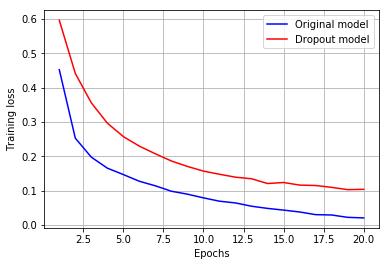

In [23]:
dropout_model_train_loss = dropout_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b', label='Original model')
plt.plot(epochs, dropout_model_train_loss, 'r', label='Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()
plt.grid()

plt.show()

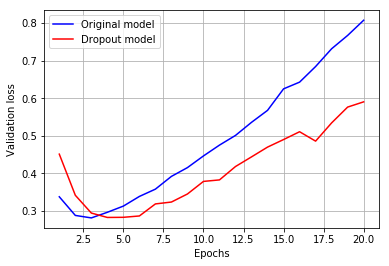

In [24]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b', label='Original model')
plt.plot(epochs, dropout_model_val_loss, 'r', label='Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.grid()

plt.show()